In [1]:
!pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
data = pd.read_csv("dataset_full.csv")
print("Shape:", data.shape)
data.head()


Shape: (88647, 112)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [16]:
selected_features = [
    # Structural URL features
    'qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
    'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
    'qty_exclamation_url', 'qty_percent_url',

    # Length and domain
    'length_url', 'domain_length', 'domain_in_ip',

    # Email/shortening/redirection
    'email_in_url', 'url_shortened', 'qty_redirects',

    # DNS and SSL (if available)
    'qty_mx_servers', 'qty_nameservers', 'tls_ssl_certificate',

    # Google index flags (keep or drop depending on your approach)
    'url_google_index', 'domain_google_index'
]

X = data[selected_features]
y = data['phishing']


In [17]:
print(data.columns.tolist())


['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_spac

In [18]:
selected_features = [
    # URL structure-based features
    'qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_questionmark_url',
    'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_percent_url',
    'length_url',

    # Domain-based features
    'domain_length', 'domain_in_ip',

    # SSL & redirection
    'tls_ssl_certificate', 'qty_redirects',

    # WHOIS & DNS indicators
    'domain_spf', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers',

    # URL reputation-related
    'url_google_index', 'domain_google_index',

    # Obfuscation
    'url_shortened', 'email_in_url'
]

X = data[selected_features]
y = data['phishing']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9491821771009589

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     11600
           1       0.92      0.93      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.94      0.95      0.94     17730
weighted avg       0.95      0.95      0.95     17730



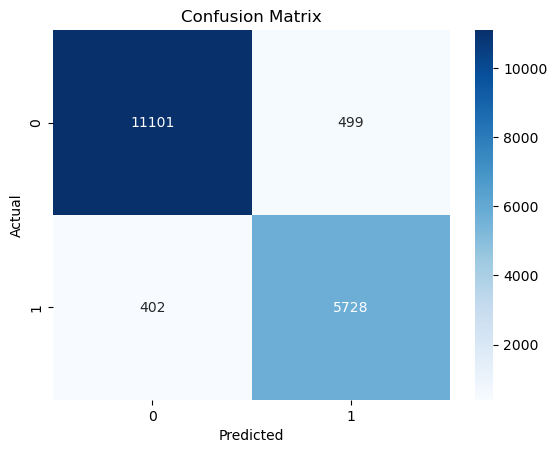

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


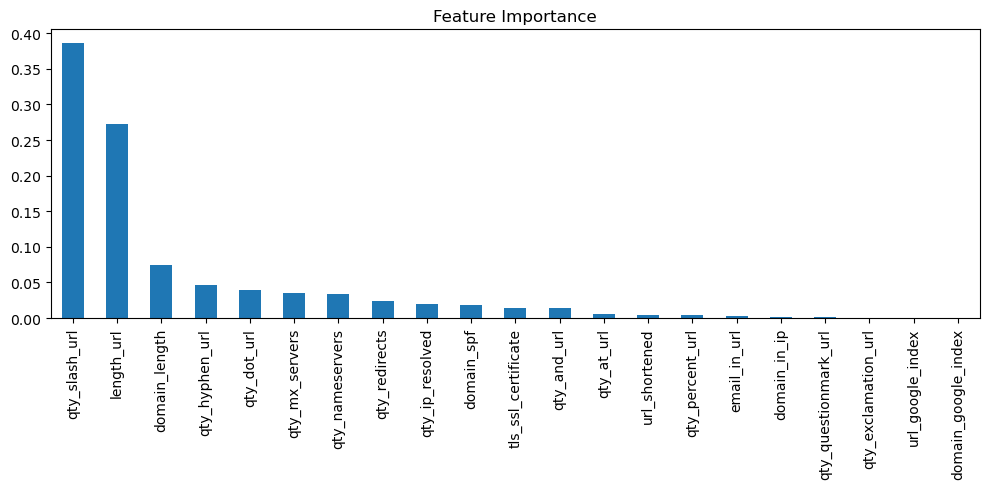

In [22]:
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=selected_features)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.tight_layout()
plt.show()


In [23]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'models/random_forest_model.pkl')

# Save the list of features used during training
joblib.dump(selected_features, 'models/selected_features.pkl')

print("✅ Model and feature list saved successfully!")


✅ Model and feature list saved successfully!
